I've used this kind of technique to visualize animations for a long time. Here's how it works:

- first, define the figure handle `fig` in a bespoke cell, this helps the figure to have a nice size throughout the animation
- second, in the loop, before you want to define the plot, `fig.clf()` needs to be called to ensure that the plots don't overlay on top of each other. This helps with makign the animation faster
- lastly, after plotting what you want, use `fig.canvas.draw()` to update the figure within the loop, generating a nice animation.

This can be tricky to handle with an axis handle, however still not so complicated:

- instead of calling `fig.clf()`, `ax.cla()` needs to be called. The reason behind this is that clearing the figure also clears the definition of the subplot axis.

# Imports

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define animation

In [7]:
vertices = [
    [0, 0, 0],
    [1, 0, 0],
    [1, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 1],
    [1, 1, 1],
    [0, 1, 1]
]
edges = [
    (0, 1), (1, 2), (2, 3), (3, 0),
    (4, 5), (5, 6), (6, 7), (7, 4),
    (0, 4), (1, 5), (2, 6), (3, 7)
]
# Plotting
ax = fig.add_subplot(111, projection='3d')
for angle in range(0,180,10): # for angles, 0,10,20...,180
    ax.cla() # important to clear ax only, not fig
    for vertex in vertices: # scatter the nodes
        ax.scatter(vertex[0], vertex[1], vertex[2], color='r')
    for edge in edges: # plot the edges as lines
        ax.plot3D([vertices[edge[0]][0], vertices[edge[1]][0]],
                  [vertices[edge[0]][1], vertices[edge[1]][1]],
                  [vertices[edge[0]][2], vertices[edge[1]][2]], 'b')
    # add labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    # adjust the angle and update the plot, save fig for later
    ax.view_init(30, angle)
    ax.set_title("Rotation: "+str(angle)+"°")
    fig.canvas.draw()

# Important, defining the figure in a seperate cell

<IPython.core.display.Javascript object>


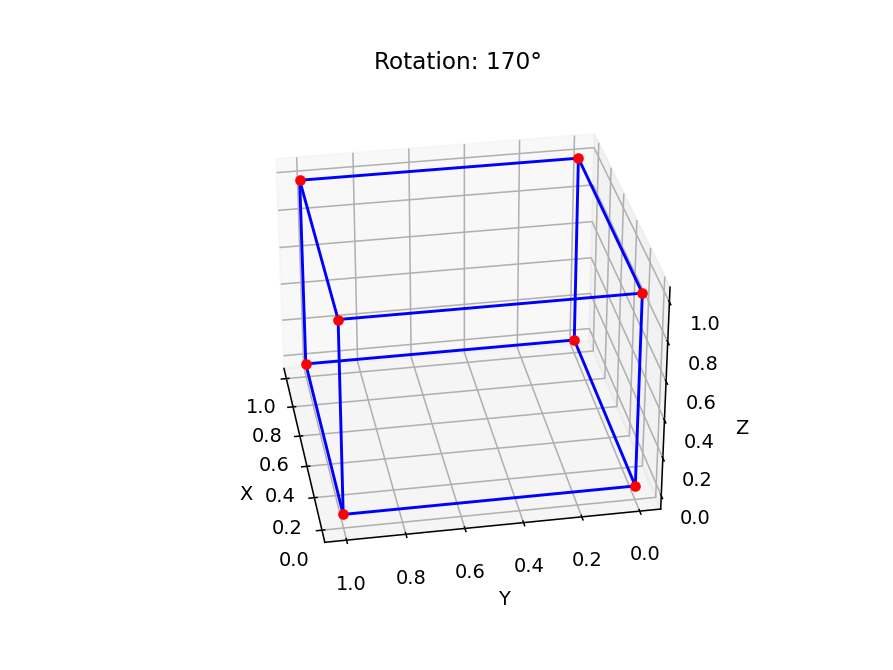

In [6]:
fig = plt.figure()